# Glass Identification Database – Classification Project

**Author:** Tan Shi Wei 

**Date:** 01/09/2025  

**Dataset Source:** [UCI Machine Learning Repository – Glass Identification Dataset](https://archive.ics.uci.edu/ml/datasets/glass+identification)

## 1️⃣ Project Overview

This project explores the Glass Identification Dataset to classify types of glass using multiclass logistic regression.

**Objectives:**
- Understand the data and its features.
- Perform preprocessing and feature analysis.
- Train and evaluate a multiclass classification model.
- Interpret results and assess feature importance.

## 2️⃣ Dataset Information

**Creators / Donors:**
- **Creator:** B. German, Central Research Establishment, Home Office Forensic Science Service, UK  
- **Donor:** Vina Spiehler, Ph.D., DABFT, Diagnostic Products Corporation  

**Date:** September 1987  
**Number of Instances:** 214  
**Number of Attributes:** 10 numeric + 1 class label  

**Class Labels (types of glass):**
| Class ID | Glass Type |
|----------|------------|
| 1        | building_windows_float_processed |
| 2        | building_windows_non_float_processed |
| 3        | vehicle_windows_float_processed |
| 4        | vehicle_windows_non_float_processed (none) |
| 5        | containers |
| 6        | tableware |
| 7        | headlamps |

**Attribute Summary:**
| Attribute | Description |
|-----------|-------------|
| Id        | Identifier |
| RI        | Refractive index |
| Na        | Sodium (weight %) |
| Mg        | Magnesium (weight %) |
| Al        | Aluminum (weight %) |
| Si        | Silicon (weight %) |
| K         | Potassium (weight %) |
| Ca        | Calcium (weight %) |
| Ba        | Barium (weight %) |
| Fe        | Iron (weight %) |
| Type      | Class label (see table above) |

**Notes:**
- No missing values.
- Attributes are continuous.
- Some features show strong correlation with class.

## 3️⃣ Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## 4️⃣ Load Dataset

In [2]:
# Load dataset
data = pd.read_csv('data/glass.data', header=None)

# Assign column names
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
data.columns = columns

# Drop Id column
df = data.drop('Id', axis=1)

## 5️⃣ Exploratory Data Analysis (EDA)

### 5.1 Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### 5.2 Class Distribution

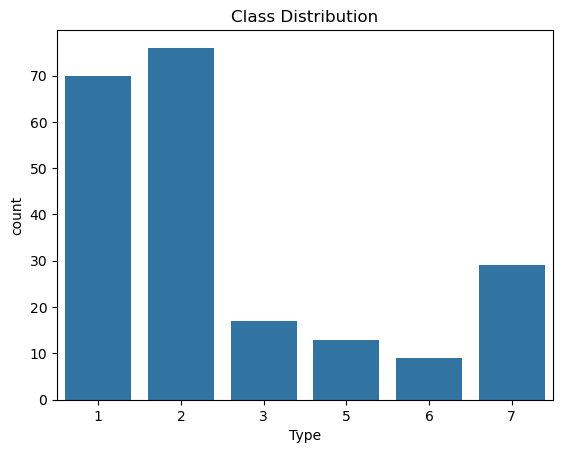

In [4]:
sns.countplot(x = 'Type', data = df)
plt.title('Class Distribution')
plt.show()

The count plot shows the distribution of the seven glass types in the dataset. Notably, Type 4 (vehicle windows, non-float processed) is absent, while other classes such as building windows (Type 1 and 2) dominate the dataset. This uneven representation highlights a class imbalance, which could affect model training and may require strategies like stratified sampling or class weighting to ensure fair performance across all types.

### 5.3 Correlation Heatmap

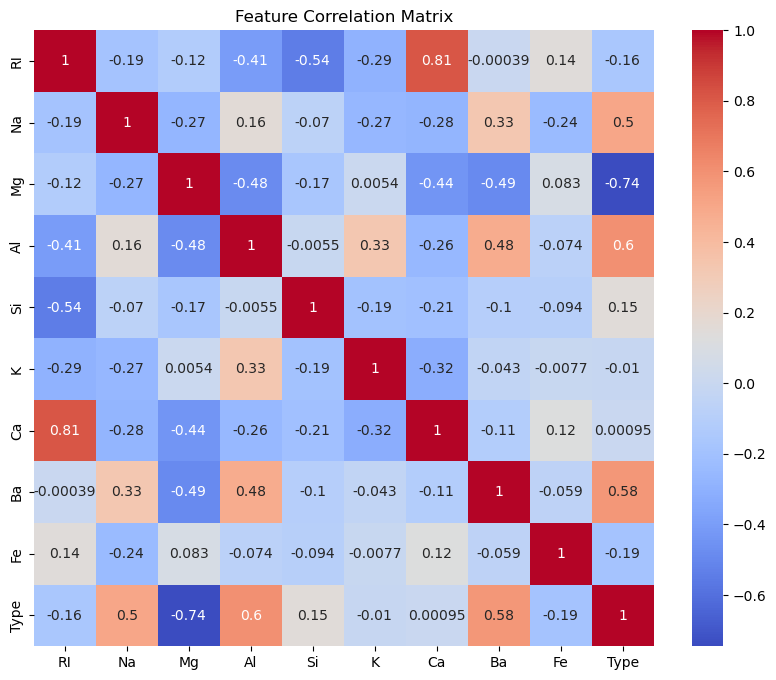

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

During the correlation analysis, a few notable relationships stood out. 

- Calcium is strongly positively correlated with the refractive index **(r = 0.81)**, suggesting that higher calcium content is associated with higher refractive indices, which could help differentiate certain types of glass.
- The class label (Type) is strongly negatively correlated with magnesium **(r = -0.74)**, indicating that higher magnesium levels are more characteristic of some glass types than others.

These strong correlations highlight potential predictive features for classification and suggest that both calcium and magnesium may be important variables when building a logistic regression model for this dataset.

## 6️⃣ Preprocessing

In [6]:
# Split features and target
X = df.drop('Type', axis = 1)
y = df['Type']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42, stratify = y)

## 7️⃣ Modeling – Multiclass Logistic Regression

In [7]:
# Initialize model
model = LogisticRegression(max_iter = 1000)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

## 8️⃣ Evaluation

              precision    recall  f1-score   support

           1       0.64      0.76      0.70        21
           2       0.65      0.65      0.65        23
           3       0.00      0.00      0.00         5
           5       1.00      0.75      0.86         4
           6       0.67      0.67      0.67         3
           7       0.90      1.00      0.95         9

    accuracy                           0.69        65
   macro avg       0.64      0.64      0.64        65
weighted avg       0.65      0.69      0.67        65



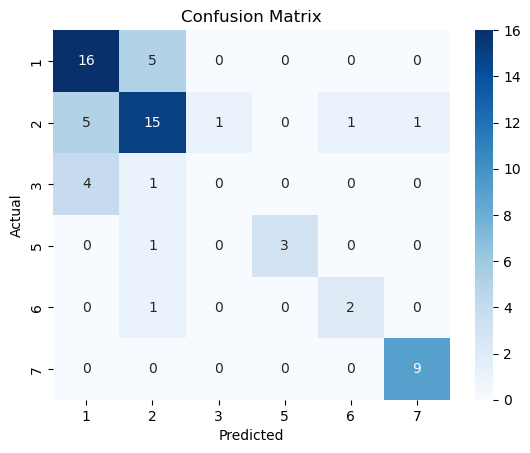

In [8]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = [1, 2, 3, 5, 6, 7]
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 9️⃣ Conclusion

The multiclass logistic regression model achieved an overall accuracy of 69% on the test set with performance varying across glass types:

- Glass types 1 and 2 (the most represented classes) were classified with moderate precision and recall (~0.65–0.70), indicating the model can identify these categories reasonably well.

- Glass type 7 showed the strongest results with near-perfect recall and precision, suggesting the model is highly reliable for this class.

- Glass types 3, 5, and 6 had poor or inconsistent performance, with type 3 not being detected at all. This is likely due to the very small number of samples available for these classes, making it difficult for logistic regression to generalize effectively.

Overall, while logistic regression demonstrates some predictive capability, the imbalanced nature of the dataset and the linear decision boundaries of the model limit its performance. Future improvements could involve:

- Trying more powerful classifiers such as Random Forests or XGBoost, which handle class imbalance better.

- Exploring feature engineering or dimensionality reduction to improve class separability.

This project highlights both the strengths and limitations of logistic regression in handling multiclass problems with imbalanced datasets, and sets the stage for further model experimentation.